
## Logistic Regression Micro Project
### Data obtained from Kaggle: Healthcare Stroke Data
### Link: https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/downloads/healthcare-dataset-stroke-data.zip/1



In [191]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression


In [192]:
data = pd.read_csv('healthdatatrain.csv')

In [193]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


<module 'matplotlib.pyplot' from 'C:\\Users\\jonat\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

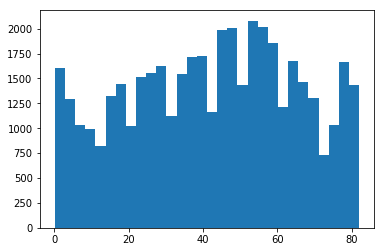

In [194]:
plt.hist(data['age'],bins=30)
plt
## Patient Age Distribution

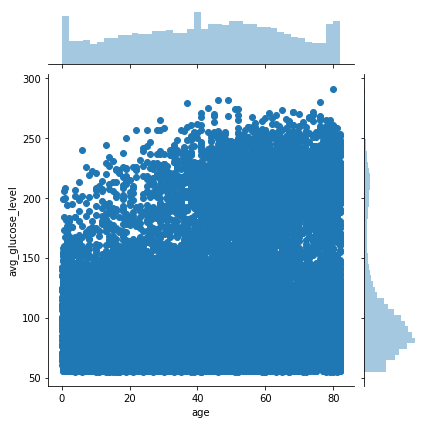

In [92]:
sn.jointplot('age','avg_glucose_level',data)
## Age and Average glucose level relationship

In [195]:
data.drop(['id'],axis=1,inplace=True)
## Dropping ID value, considering its a numeric value, it will be plotted and we dont want that. The string values will be ignored by seaborn and as a result wont be plotted

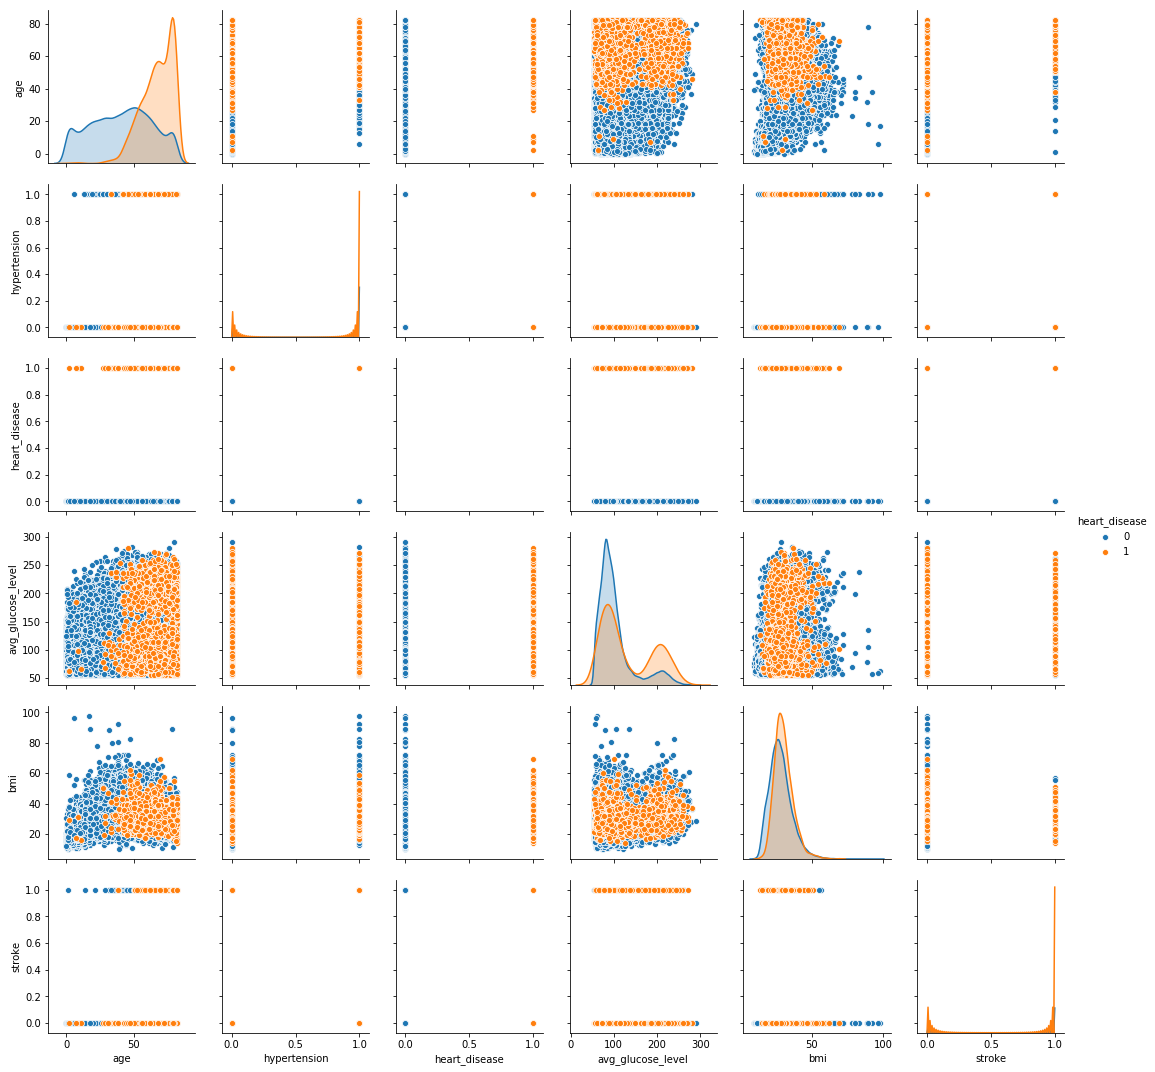

In [197]:
sn.pairplot(data,hue='heart_disease')

### A pairplot above to visualize all relationships between numeric features (ID discluded)

## Building our Model

In [198]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [199]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [200]:
data.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1,inplace=True)
## Removing string features, this might not be the best idea since useful information is lost

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [202]:
np.any(np.isnan(data))
np.all(np.isfinite(data))

data = data.fillna(data.mean())
## the reason for the function above is primarily due to the dataset consisting of NaN values meaning it needs cleaning.
## We cant fit the model with unclean data so we replace the null values of a certain feature with the calculated average of all values of that feature

X = data.drop(['stroke'],axis=1) 
y = data['stroke'] # Target value



In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [205]:

logreg.fit(X,y)

C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [206]:
predictions = logreg.predict(X_test)

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12780
           1       0.00      0.00      0.00       240

   micro avg       0.98      0.98      0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
